# Upload file in google colab

In [48]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer (1).csv


# Load the file and print a part of it

In [49]:
import pandas as pd

# Read CSV file
file_path = 'risk_factors_cervical_cancer.csv'
df = pd.read_csv(file_path)

# Display the dataframe
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Data Understanding

## 1. Count the missing values

In [50]:
# Read CSV file
file_path = 'risk_factors_cervical_cancer.csv'
df = pd.read_csv(file_path)

# "?" representing missing values
df.replace("?", pd.NA, inplace=True)

missing_values = df.isnull()
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("########## Missing Values Count ##########\n")
print(missing_count)

print("\n######### Missing Values Percentage #########\n")
print(missing_percentage.round(2))

########## Missing Values Count ##########

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                        

## 2. Data Understanding (Graphs)

### Distribution - Features

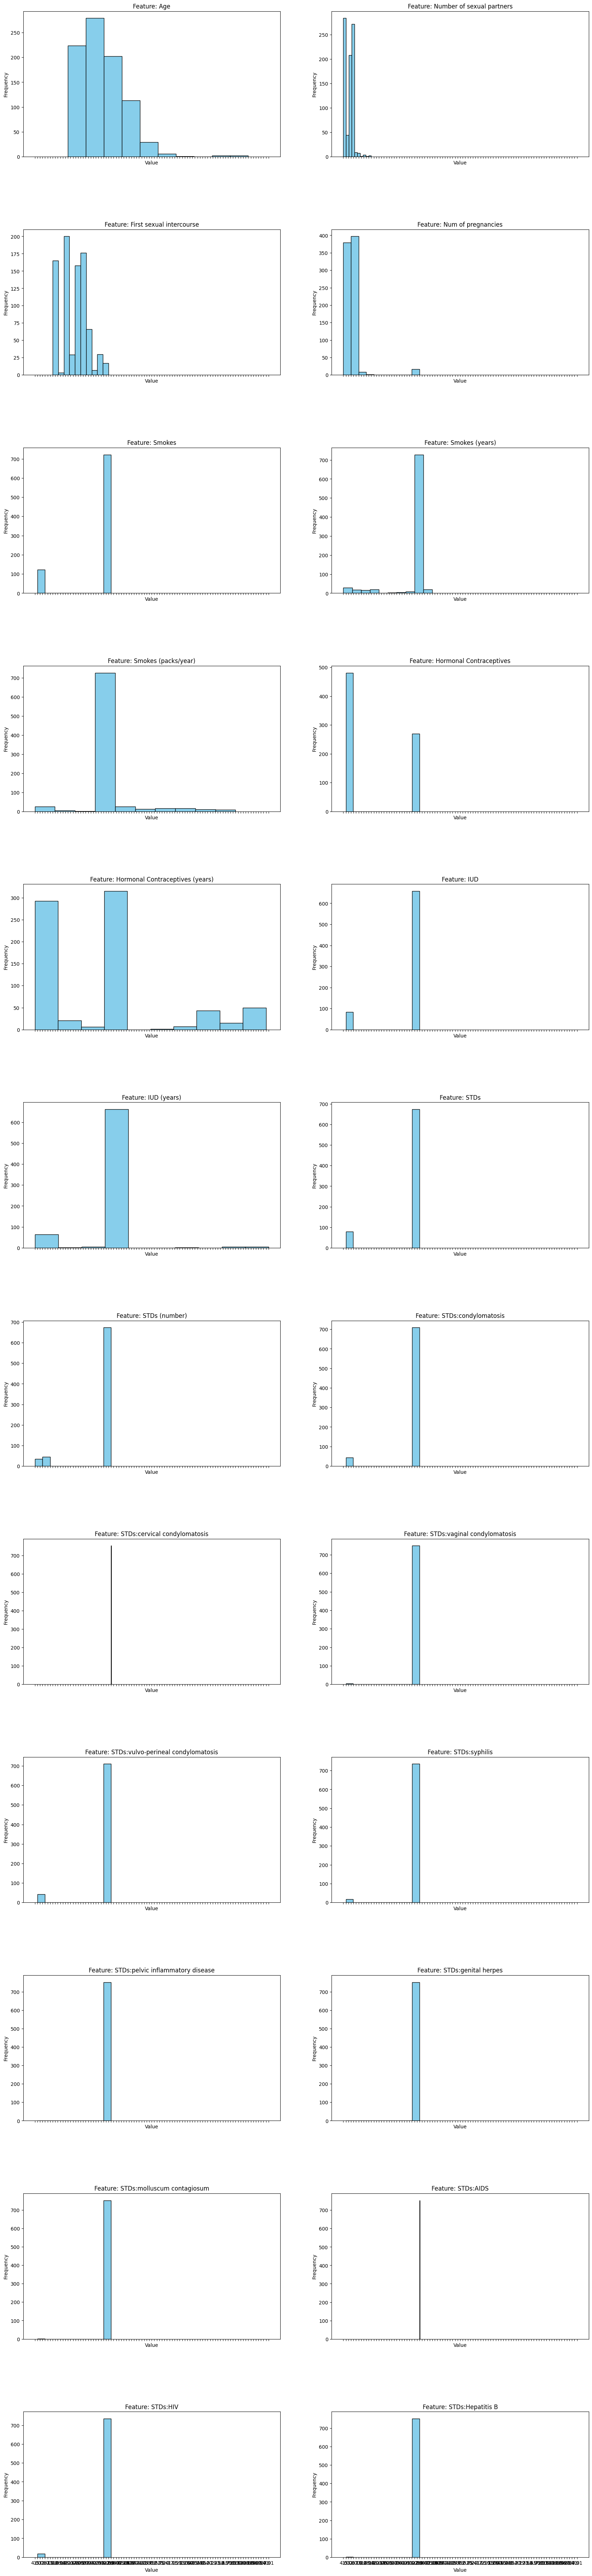

In [51]:
import matplotlib.pyplot as plt

# Select the first 24 features
selected_features = df.columns[:24]

# Set up a 12 x 2 subplot grid
fig, axes = plt.subplots(12, 2, figsize=(20, 80), sharex=True, gridspec_kw={'hspace': 0.5})

# Flatten the 12x2 subplot grid into a 1D array for easy indexing
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Drop NaN values and plot a histogram for each feature without grid lines
    ax = axes[i]
    df[feature].dropna().hist(bins=10, edgecolor='black', color='skyblue', ax=ax, grid=False)
    ax.set_title(f'Feature: {feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.2)
plt.show()

### Distribution - Target Values

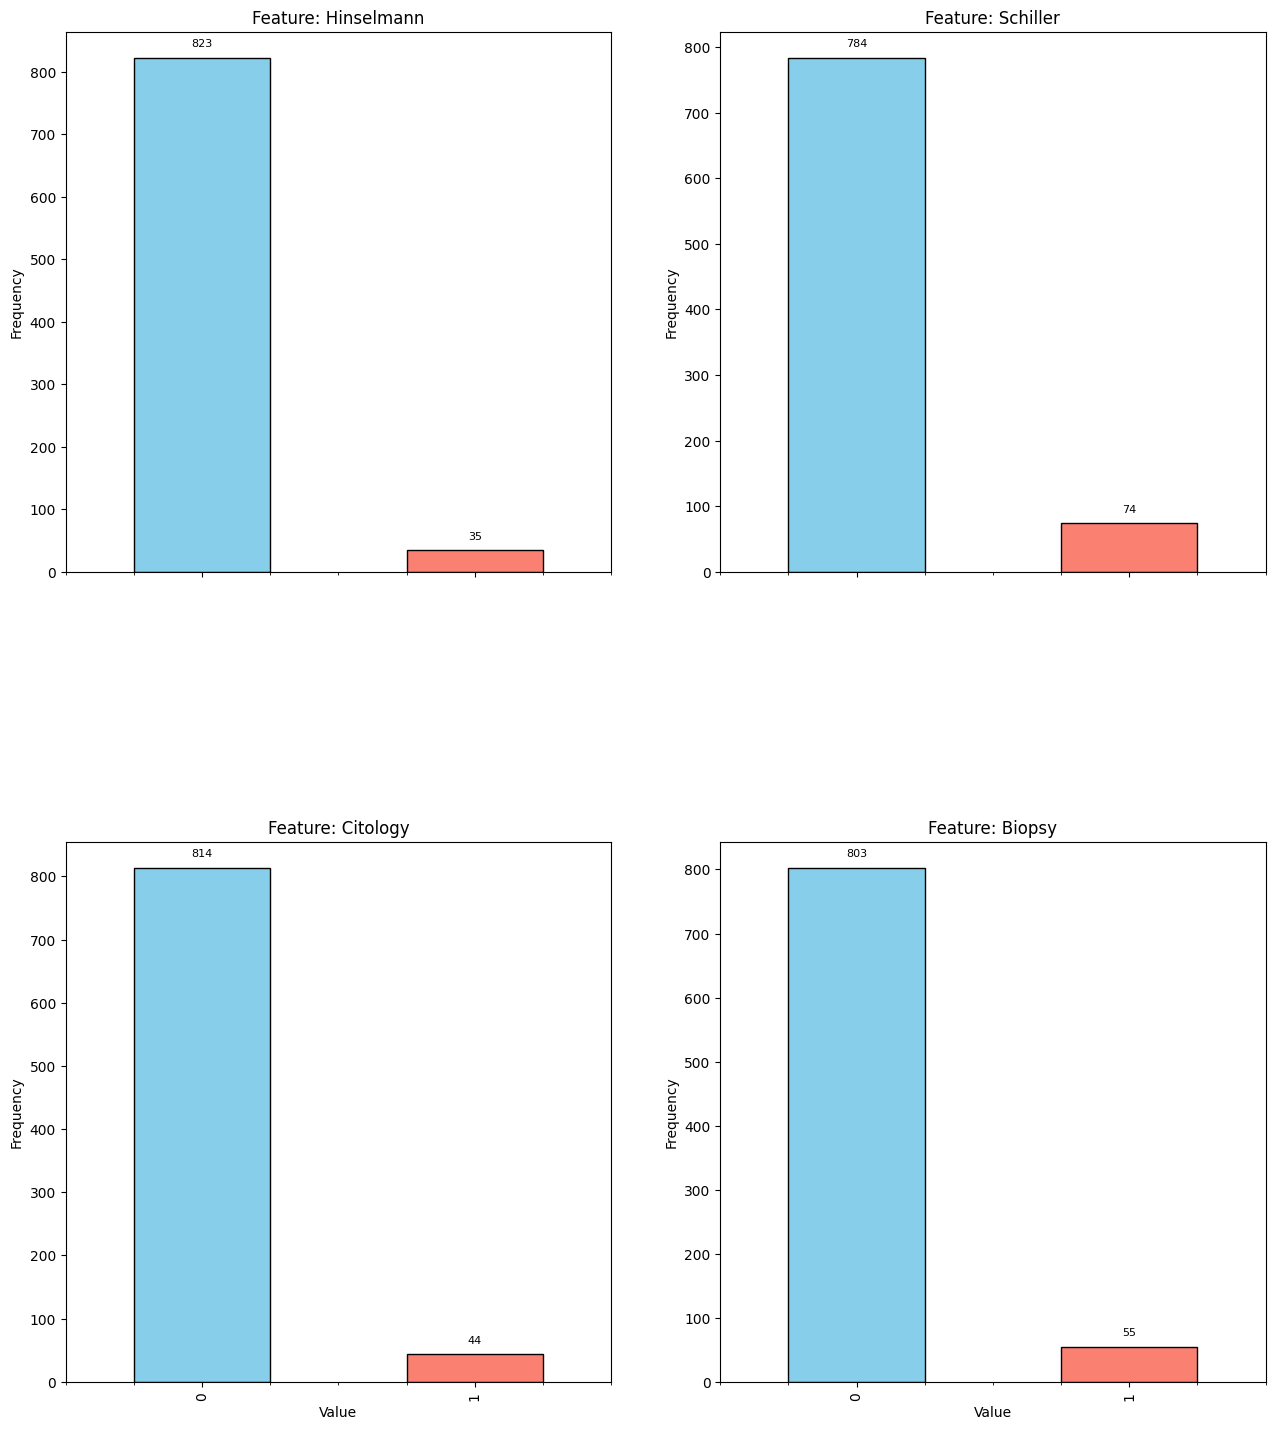

In [52]:
import matplotlib.pyplot as plt

# Select the features we need
selected_features = df.columns[-4:]

# Set up a 2 x 2 subplot grid (4 features will be accommodated in 4 rows)
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True, gridspec_kw={'hspace': 0.5})

# Flatten the 4x2 subplot grid into a 1D array for easy indexing
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Plot a bar plot for each binary feature
    ax = axes[i]
    df[feature].value_counts().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')
    ax.set_title(f'Feature: {feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Display values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.2)
plt.show()



# Pre - Processing

## 1. Data Cleaning

### Remove Duplicates



In [53]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Reset the index after dropping duplicates
df_cleaned.reset_index(drop=True, inplace=True)

### Handling missing values

In [54]:
column_types = df_cleaned.dtypes

print("Data types of columns:")
print(column_types)

Data types of columns:
Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                       

In [55]:
# Creating copy of the dataset
df_copy = df_cleaned.copy()

nan_count = df_copy.isnull().sum()
print("\nBefore handling missing values:\n", nan_count)

#Dropping rows where these values are missing
df_copy = df_copy.dropna(subset=['STDs'])
df_copy = df_copy.dropna(subset=['Smokes'])
df_copy = df_copy.dropna(subset=['IUD'])

# Replacing missing values with Medians
part_median = df_copy['Number of sexual partners'].median()
df_copy['Number of sexual partners'] = df_copy['Number of sexual partners'].fillna(part_median)

first_median = df_copy['First sexual intercourse'].median()
df_copy['First sexual intercourse'] = df_copy['First sexual intercourse'].fillna(first_median)

#Age can not be smaller than First Sexual Intercourse
# Convert column 'First sexual intercourse' to float type so that we can do the following comparison
df_copy['First sexual intercourse'] = df_copy['First sexual intercourse'].astype(float)
# Check if value in column 'First sexual intercourse' is larger than value in column 'Age'
mask = df_copy['First sexual intercourse'] > df_copy['Age']

# Update values in column 'First sexual intercourse' where condition is met
df_copy.loc[mask, 'First sexual intercourse'] = df_copy.loc[mask, 'Age']


preg_median = df_copy['Num of pregnancies'].median()
df_copy['Num of pregnancies'] = df_copy['Num of pregnancies'].fillna(preg_median.round())

hormonal_median = df_copy['Hormonal Contraceptives'].median()
df_copy['Hormonal Contraceptives'] = df_copy['Hormonal Contraceptives'].fillna(hormonal_median)

hormonal2_median = df_copy['Hormonal Contraceptives (years)'].median()
df_copy['Hormonal Contraceptives (years)'] = df_copy['Hormonal Contraceptives (years)'].fillna(hormonal2_median)


#Replacing missing values with 0 in STD times
df_copy['STDs: Time since first diagnosis'] = df_copy['STDs: Time since first diagnosis'].fillna(0)
df_copy['STDs: Time since last diagnosis'] = df_copy['STDs: Time since last diagnosis'].fillna(0)

nan_count = df_copy.isnull().sum()
print("\nAfter handling missing values:\n", nan_count)


Before handling missing values:
 Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100


## 2. Scaling

In [56]:
##Using standard scaler

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)']

scaled_df = df_copy.copy()

# Scale only selected columns
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])


print("Original DataFrame:")
print(df_copy)
print("\nDataFrame after Standard Scaling (Z-score normalization):")
print(scaled_df)


Original DataFrame:
     Age Number of sexual partners  First sexual intercourse  \
0     18                       4.0                      15.0   
1     15                       1.0                      14.0   
2     34                       1.0                      17.0   
3     52                       5.0                      16.0   
4     46                       3.0                      21.0   
..   ...                       ...                       ...   
830   34                       3.0                      18.0   
831   32                       2.0                      19.0   
832   25                       2.0                      17.0   
833   33                       2.0                      24.0   
834   29                       2.0                      20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2      

## 3. Feature Selection

In [57]:
# Delete columns 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' maybe (because most of them are empty)
scaled_df.drop('STDs: Time since first diagnosis', axis=1, inplace=True)
scaled_df.drop('STDs: Time since last diagnosis', axis=1, inplace=True)

# Delete unnedded features
scaled_df.drop('STDs', axis=1, inplace=True)
scaled_df.drop('STDs (number)', axis=1, inplace=True)
scaled_df.drop('Dx', axis=1, inplace=True)

print(scaled_df)

          Age  Number of sexual partners  First sexual intercourse  \
0   -1.084900                   0.903686                 -0.743873   
1   -1.429596                  -0.936516                 -1.095973   
2    0.753475                  -0.936516                 -0.039673   
3    2.821647                   1.517087                 -0.391773   
4    2.132256                   0.290285                  1.368727   
..        ...                        ...                       ...   
830  0.753475                   0.290285                  0.312427   
831  0.523678                  -0.323115                  0.664527   
832 -0.280611                  -0.323115                 -0.039673   
833  0.638577                  -0.323115                  2.425027   
834  0.178983                  -0.323115                  1.016627   

     Num of pregnancies Smokes  Smokes (years)  Smokes (packs/year)  \
0             -0.926193    0.0       -0.301104            -0.202406   
1             -0.

## 4. Handle Imbalanced Data

###Using only Biopsy

In [58]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define resampling strategy
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

# Create a pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

final_df_biopsy = scaled_df.copy()

y_biopsy=final_df_biopsy['Biopsy']
print(y_biopsy)
X_biopsy=final_df_biopsy.drop(columns=['Biopsy'])
print(X_biopsy)
final_df_X_train, final_df_X_test, final_df_y_train, final_df_y_test = train_test_split(X_biopsy, y_biopsy, test_size=0.3, random_state=42)

X_final_resampled, y_final_resampled = pipeline.fit_resample(final_df_X_train, final_df_y_train)

0      0
1      0
2      0
3      0
4      0
      ..
830    0
831    0
832    0
833    0
834    0
Name: Biopsy, Length: 710, dtype: int64
          Age  Number of sexual partners  First sexual intercourse  \
0   -1.084900                   0.903686                 -0.743873   
1   -1.429596                  -0.936516                 -1.095973   
2    0.753475                  -0.936516                 -0.039673   
3    2.821647                   1.517087                 -0.391773   
4    2.132256                   0.290285                  1.368727   
..        ...                        ...                       ...   
830  0.753475                   0.290285                  0.312427   
831  0.523678                  -0.323115                  0.664527   
832 -0.280611                  -0.323115                 -0.039673   
833  0.638577                  -0.323115                  2.425027   
834  0.178983                  -0.323115                  1.016627   

     Num of pregnanc

Index(['Biopsy'], dtype='object')


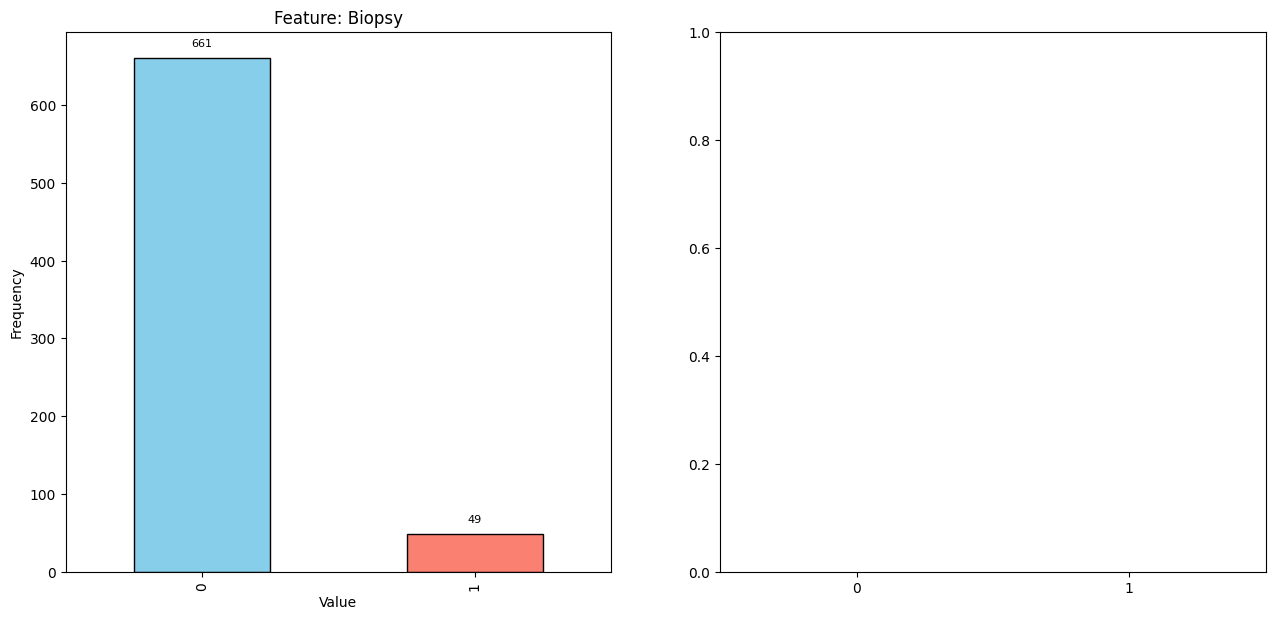

In [59]:
import matplotlib.pyplot as plt

# Select the features we need
selected_features = final_df_biopsy.columns[-1:]
print(selected_features)


fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, gridspec_kw={'hspace': 0.5})

# Flatten
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Plot a bar plot
    ax = axes[i]
    final_df_biopsy[feature].value_counts().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')
    ax.set_title(f'Feature: {feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Display values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.2)
plt.show()

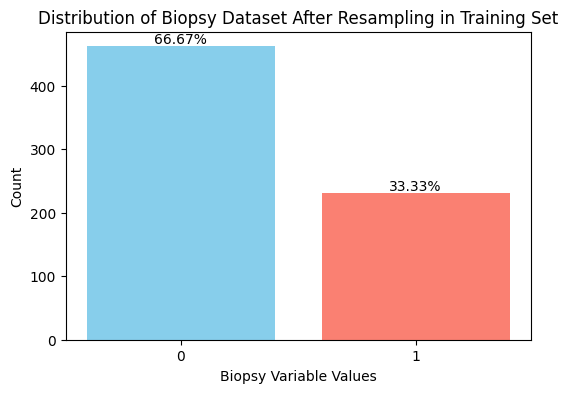

In [60]:
import matplotlib.pyplot as plt

# Plot the distribution of the binary target variable with class counts displayed on top
plt.figure(figsize=(6, 4))
total_samples = len(y_final_resampled)
counts = y_final_resampled.value_counts()
percentages = counts / total_samples * 100
plt.bar([0, 1], counts, color=['skyblue', 'salmon'])
plt.title('Distribution of Biopsy Dataset After Resampling in Training Set')
plt.xlabel('Biopsy Variable Values')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-axis ticks to match the binary values

# Display class percentages on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [61]:
from google.colab import files
import pandas as pd

final_df_train_biopsy = pd.concat([X_final_resampled, y_final_resampled], axis=1)

# Shuffle the rows excluding the first row
final_df_train_biopsy = final_df_train_biopsy.iloc[1:].sample(frac=1).reset_index(drop=True)

final_df_test_biopsy = pd.concat([final_df_X_test, final_df_y_test], axis=1)

# Shuffle the rows excluding the first row
final_df_test_biopsy = final_df_test_biopsy.iloc[1:].sample(frac=1).reset_index(drop=True)

###Handling whole dataset

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define resampling strategy
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

# Create a pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Fit and transform the data
# Check if any of the columns have 1, if yes, set 'combined' to 1, else 0
columns_to_drop = ['Schiller', 'Citology', 'Biopsy', 'Hinselmann']
combined_df=scaled_df[columns_to_drop].copy()
combined_df['combined'] = (combined_df.sum(axis=1) > 0).astype(int)

final_df_comb=scaled_df.drop(columns=columns_to_drop)

final_df_comb['combined']=combined_df['combined']


y_comb=final_df_comb['combined']
print(y_comb)
X_comb=final_df_comb.drop(columns=['combined'])
print(X_comb)
final_df_X_train, final_df_X_test, final_df_y_train, final_df_y_test = train_test_split(X_comb, y_comb, test_size=0.3, random_state=42)

X_final_resampled, y_final_resampled = pipeline.fit_resample(final_df_X_train, final_df_y_train)


0      0
1      0
2      0
3      0
4      0
      ..
830    0
831    0
832    1
833    0
834    0
Name: combined, Length: 710, dtype: int64
          Age  Number of sexual partners  First sexual intercourse  \
0   -1.084900                   0.903686                 -0.743873   
1   -1.429596                  -0.936516                 -1.095973   
2    0.753475                  -0.936516                 -0.039673   
3    2.821647                   1.517087                 -0.391773   
4    2.132256                   0.290285                  1.368727   
..        ...                        ...                       ...   
830  0.753475                   0.290285                  0.312427   
831  0.523678                  -0.323115                  0.664527   
832 -0.280611                  -0.323115                 -0.039673   
833  0.638577                  -0.323115                  2.425027   
834  0.178983                  -0.323115                  1.016627   

     Num of pregna

Index(['combined'], dtype='object')


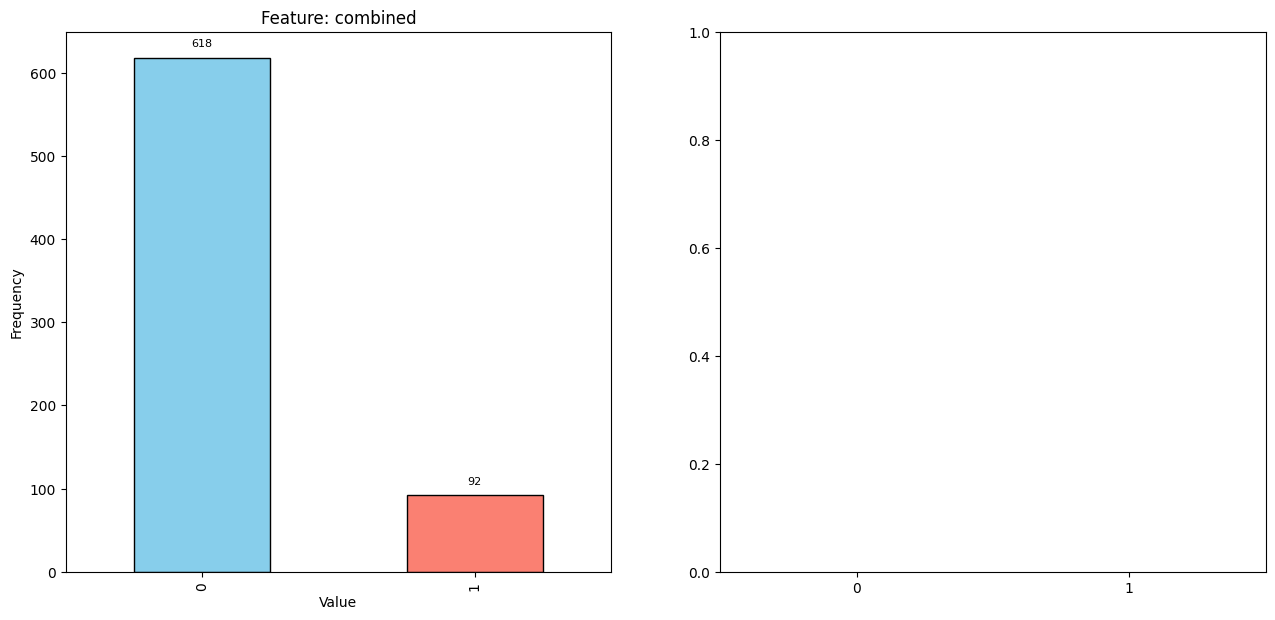

In [64]:
import matplotlib.pyplot as plt

# Select the features we need
selected_features = final_df_comb.columns[-1:]
print(selected_features)


fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, gridspec_kw={'hspace': 0.5})

# Flatten
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Plot a bar plot for each binary feature
    ax = axes[i]
    final_df_comb[feature].value_counts().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')
    ax.set_title(f'Feature: {feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Display values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.2)
plt.show()


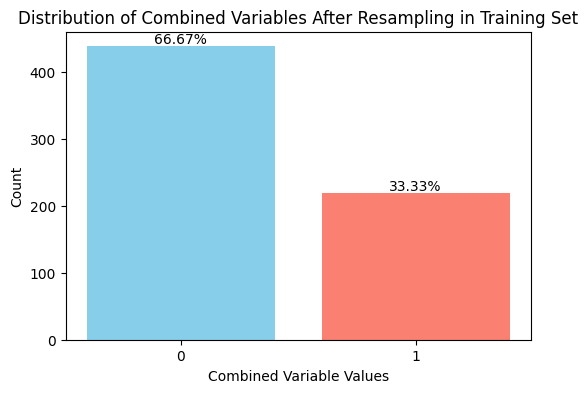

In [65]:
import matplotlib.pyplot as plt

# Plot the distribution of the binary target variable with class counts displayed on top
plt.figure(figsize=(6, 4))
total_samples = len(y_final_resampled)
counts = y_final_resampled.value_counts()
percentages = counts / total_samples * 100
plt.bar([0, 1], counts, color=['skyblue', 'salmon'])
plt.title('Distribution of Combined Variables After Resampling in Training Set')
plt.xlabel('Combined Variable Values')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-axis ticks to match the binary values

# Display class percentages on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [66]:
from google.colab import files
import pandas as pd

final_df_train_comb = pd.concat([X_final_resampled, y_final_resampled], axis=1)

final_df_train_comb = final_df_train_comb.iloc[1:].sample(frac=1).reset_index(drop=True)

final_df_test_comb = pd.concat([final_df_X_test, final_df_y_test], axis=1)

final_df_test_comb = final_df_test_comb.iloc[1:].sample(frac=1).reset_index(drop=True)

###Using only Schiller

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define resampling strategy
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

# Create a pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)


final_df_sch=scaled_df.copy()


y_sch=final_df_sch['Schiller']
print(y_sch)
X_sch=final_df_sch.drop(columns=['Schiller'])
print(X_sch)
final_df_X_train, final_df_X_test, final_df_y_train, final_df_y_test = train_test_split(X_sch, y_sch, test_size=0.3, random_state=42)

X_final_resampled, y_final_resampled = pipeline.fit_resample(final_df_X_train, final_df_y_train)


0      0
1      0
2      0
3      0
4      0
      ..
830    0
831    0
832    0
833    0
834    0
Name: Schiller, Length: 710, dtype: int64
          Age  Number of sexual partners  First sexual intercourse  \
0   -1.084900                   0.903686                 -0.743873   
1   -1.429596                  -0.936516                 -1.095973   
2    0.753475                  -0.936516                 -0.039673   
3    2.821647                   1.517087                 -0.391773   
4    2.132256                   0.290285                  1.368727   
..        ...                        ...                       ...   
830  0.753475                   0.290285                  0.312427   
831  0.523678                  -0.323115                  0.664527   
832 -0.280611                  -0.323115                 -0.039673   
833  0.638577                  -0.323115                  2.425027   
834  0.178983                  -0.323115                  1.016627   

     Num of pregna

Index(['Biopsy'], dtype='object')


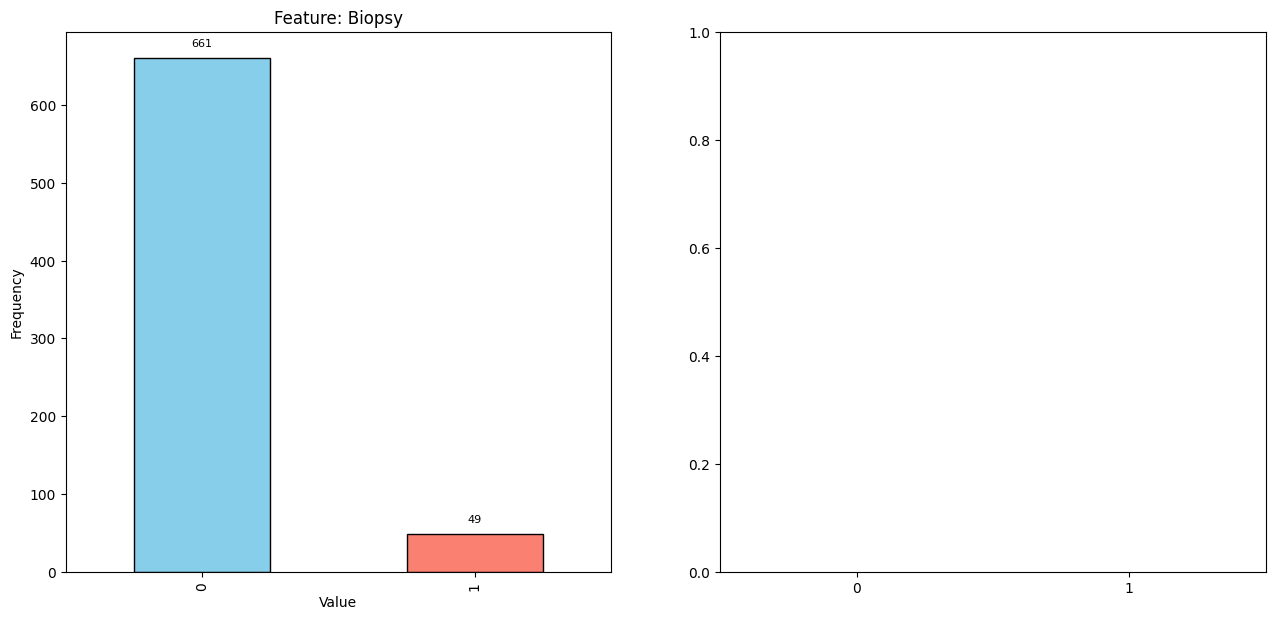

In [69]:
import matplotlib.pyplot as plt

# Select the features we need
selected_features = final_df_sch.columns[-1:]
print(selected_features)


fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, gridspec_kw={'hspace': 0.5})

# Flatten
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    # Plot a bar plot for each binary feature
    ax = axes[i]
    final_df_sch[feature].value_counts().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')
    ax.set_title(f'Feature: {feature}', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Display values on top of each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Adjust layout for better spacing
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.9, hspace=0.5, wspace=0.2)
plt.show()


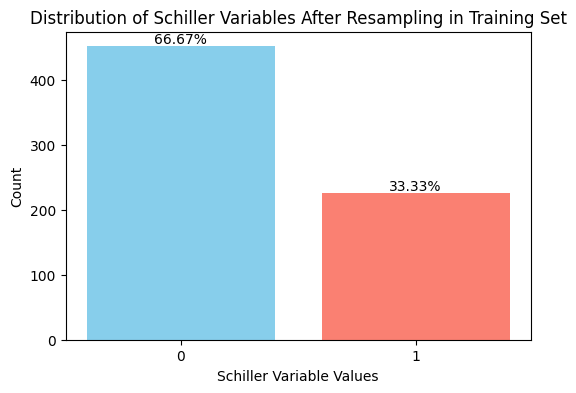

In [70]:
import matplotlib.pyplot as plt

# Plot the distribution of the binary target variable with class counts displayed on top
plt.figure(figsize=(6, 4))
total_samples = len(y_final_resampled)
counts = y_final_resampled.value_counts()
percentages = counts / total_samples * 100
plt.bar([0, 1], counts, color=['skyblue', 'salmon'])
plt.title('Distribution of Schiller Variables After Resampling in Training Set')
plt.xlabel('Schiller Variable Values')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set x-axis ticks to match the binary values

# Display class percentages on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 0.1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [71]:
from google.colab import files
import pandas as pd

final_df_train_sch = pd.concat([X_final_resampled, y_final_resampled], axis=1)

# Shuffle the rows excluding the first row
final_df_train_sch = final_df_train_sch.iloc[1:].sample(frac=1).reset_index(drop=True)

final_df_test_sch = pd.concat([final_df_X_test, final_df_y_test], axis=1)

# Shuffle the rows excluding the first row
final_df_test_sch = final_df_test_sch.iloc[1:].sample(frac=1).reset_index(drop=True)

##Testing Datasets

###Schiller

In [72]:
from sklearn.model_selection import train_test_split

X_train_sch = final_df_train_sch.drop(columns=['Schiller'])  # Features
y_train_sch = final_df_train_sch['Schiller']  # Target variable

X_test_sch = final_df_test_sch.drop(columns=['Schiller'])  # Features
y_test_sch = final_df_test_sch['Schiller']  # Target variable

####SVM

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can change the kernel as needed

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_sch, y_train_sch)

# Make predictions on the test data
svm_y_pred = svm_classifier.predict(X_test_sch)
print(svm_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_sch, svm_y_pred)
print("SVM Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_sch, svm_y_pred)
print("SVM Precision:", precision)

# Calculate recall
recall = recall_score(y_test_sch, svm_y_pred)
print("SVM Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_sch, svm_y_pred)
print("SVM F1-score:", f1)

[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
SVM Accuracy: 0.9622641509433962
SVM Precision: 0.9
SVM Recall: 0.75
SVM F1-score: 0.8181818181818182


Confusion Matrix:
[[186   2]
 [  6  18]]
True Positive Rate (Sensitivity/Recall): 0.75
False Positive Rate: 0.010638297872340425


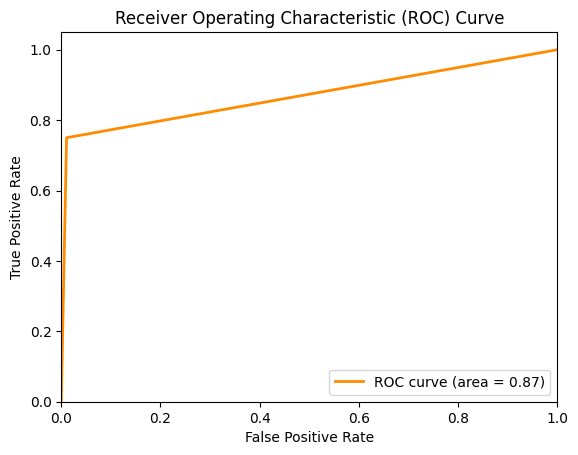

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_sch, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_sch, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#####SBF Feature Selection

In [75]:
from sklearn.metrics import roc_auc_score
import numpy as np
from itertools import combinations
from sklearn.base import clone

class SBS:
    def __init__(self, estimator, k_features, scoring=roc_auc_score, random_state=None):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.random_state = random_state

    def fit(self, X, y):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        dim = X.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X, y, self.indices_)
        self.scores_ = [score]
        self.best_score_ = score  # Track the best score
        self.best_subset_ = self.indices_  # Track the best subset

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X, y, p)
                scores.append(score)
                subsets.append(p)

            best_idx = np.argmax(scores)
            if scores[best_idx] > self.best_score_:  # Check if current subset is better
                self.best_score_ = scores[best_idx]
                self.best_subset_ = subsets[best_idx]

            self.indices_ = subsets[best_idx]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best_idx])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.best_subset_]  # Transform using the best subset

    def _calc_score(self, X, y, indices):
        X_train, X_test, y_train, y_test = train_test_split(X[:, indices], y, test_size=0.3, random_state=42)
        self.estimator.fit(X_train, y_train)
        y_pred_proba = self.estimator.predict_proba(X_test)[:, 1]
        score = self.scoring(y_test, y_pred_proba)
        return score

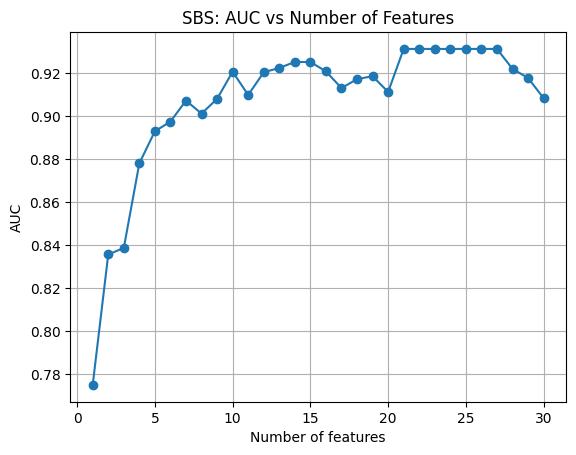

Best subset of features: Index(['Age', 'First sexual intercourse', 'Num of pregnancies', 'Smokes',
       'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum',
       'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV',
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Hinselmann', 'Citology', 'Biopsy'],
      dtype='object')
SVM AUC (selected features based on AUC using SBS): 0.8696808510638299
SVM Accuracy (selected features based on AUC using SBS): 0.9622641509433962


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import roc_auc_score, accuracy_score
import itertools

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)  # You can change the kernel as needed

# Feature selection using SBS based on AUC
sbs_auc = SBS(estimator=svm_classifier, k_features=1, scoring=roc_auc_score, random_state=42)
sbs_auc.fit(X_train_sch.values, y_train_sch.values)

# Plot the performance of the selected feature subsets based on AUC
k_feat_auc = [len(k) for k in sbs_auc.subsets_]
plt.plot(k_feat_auc, sbs_auc.scores_, marker='o')
plt.ylabel('AUC')
plt.xlabel('Number of features')
plt.title('SBS: AUC vs Number of Features')
plt.grid()
plt.show()

# Transform the datasets using the best subset based on AUC
X_train_selected_auc = sbs_auc.transform(X_train_sch.values)
X_test_selected_auc = sbs_auc.transform(X_test_sch.values)

# Train the SVM classifier on the selected features based on AUC
svm_classifier.fit(X_train_selected_auc, y_train_sch)

# Make predictions on the test data
svm_y_pred_selected_auc = svm_classifier.predict(X_test_selected_auc)

# Calculate AUC and accuracy using selected features based on AUC
auc_selected_auc = roc_auc_score(y_test_sch, svm_y_pred_selected_auc)
accuracy_selected_auc = accuracy_score(y_test_sch, svm_y_pred_selected_auc)

print("Best subset of features:", X_train_sch.columns[list(sbs_auc.best_subset_)])
print("SVM AUC (selected features based on AUC using SBS):", auc_selected_auc)
print("SVM Accuracy (selected features based on AUC using SBS):", accuracy_selected_auc)

In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_train_selected = X_train_sch[['Hormonal Contraceptives', 'IUD', 'IUD (years)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'Dx:Cancer']]
y_train_selected = y_train_sch
X_test_selected = X_test_sch[['Hormonal Contraceptives', 'IUD', 'IUD (years)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:syphilis', 'STDs:HIV', 'STDs: Number of diagnosis', 'Dx:Cancer']]
y_test_selected = y_test_sch

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_selected, y_train_selected)

# Make predictions on the test data
svm_y_pred = svm_classifier.predict(X_test_selected)
print(svm_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_selected, svm_y_pred)
print("SVM Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_selected, svm_y_pred)
print("SVM Precision:", precision)

# Calculate recall
recall = recall_score(y_test_selected, svm_y_pred)
print("SVM Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_selected, svm_y_pred)
print("SVM F1-score:", f1)

[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
SVM Accuracy: 0.7924528301886793
SVM Precision: 0.11538461538461539
SVM Recall: 0.125
SVM F1-score: 0.12000000000000001


Confusion Matrix:
[[165  23]
 [ 21   3]]
True Positive Rate (Sensitivity/Recall): 0.125
False Positive Rate: 0.12234042553191489


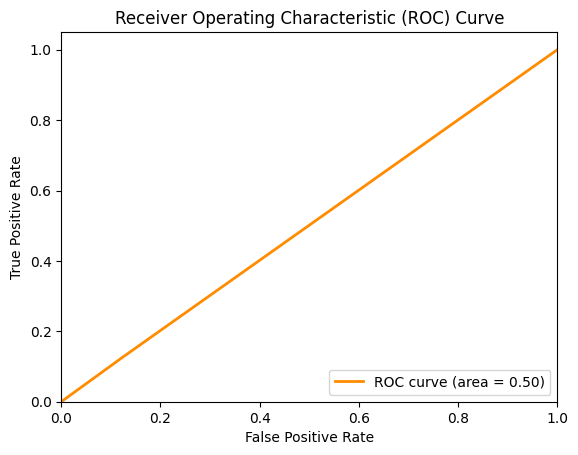

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculate confusion matrix
cm = confusion_matrix(y_test_selected, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_selected, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####MLP (Multi-layer Perceptron)

In [79]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(70,40,30), max_iter=2500, random_state=42)

# Train the MLP classifier on the training data
mlp_classifier.fit(X_train_sch, y_train_sch)

# Make predictions on the test data
mlp_y_pred = mlp_classifier.predict(X_test_sch)
print(mlp_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_sch, mlp_y_pred)
print("MLP Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_sch, mlp_y_pred)
print("MLP Precision:", precision)

# Calculate recall
recall = recall_score(y_test_sch, mlp_y_pred)
print("MLP Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_sch, mlp_y_pred)
print("MLP F1-score:", f1)

[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
MLP Accuracy: 0.8915094339622641
MLP Precision: 0.52
MLP Recall: 0.5416666666666666
MLP F1-score: 0.5306122448979592


Confusion Matrix:
[[176  12]
 [ 11  13]]
True Positive Rate (Sensitivity/Recall): 0.5416666666666666
False Positive Rate: 0.06382978723404255


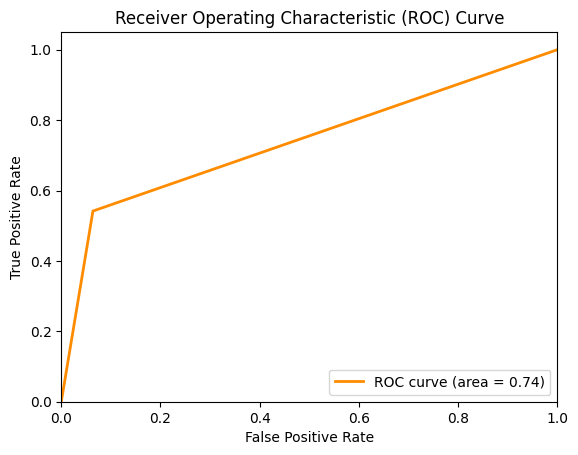

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculate confusion matrix
cm = confusion_matrix(y_test_sch, mlp_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_sch, mlp_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train_sch, y_train_sch)

# Make predictions on the test data
dt_y_pred = dt_classifier.predict(X_test_sch)
print(dt_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_sch, dt_y_pred)
print("DT Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_sch, dt_y_pred)
print("DT Precision:", precision)

# Calculate recall
recall = recall_score(y_test_sch, dt_y_pred)
print("DT Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_sch, dt_y_pred)
print("DT F1-score:", f1)

[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
DT Accuracy: 0.9481132075471698
DT Precision: 0.8421052631578947
DT Recall: 0.6666666666666666
DT F1-score: 0.744186046511628


Confusion Matrix:
[[165  23]
 [ 21   3]]
True Positive Rate (Sensitivity/Recall): 0.125
False Positive Rate: 0.12234042553191489


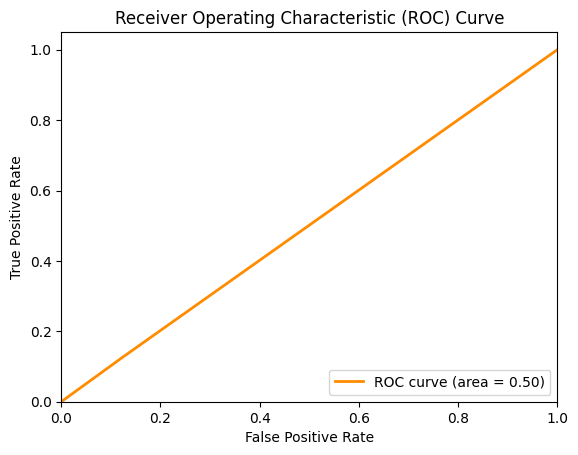

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculate confusion matrix
cm = confusion_matrix(y_test_sch, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_sch, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###Biopsy

In [83]:
from sklearn.model_selection import train_test_split

X_train_biopsy = final_df_train_biopsy.drop(columns=['Biopsy'])  # Features
y_train_biopsy = final_df_train_biopsy['Biopsy']  # Target variable

X_test_biopsy = final_df_test_biopsy.drop(columns=['Biopsy'])  # Features
y_test_biopsy = final_df_test_biopsy['Biopsy']  # Target variable

####SVM

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_biopsy, y_train_biopsy)

# Make predictions on the test data
svm_y_pred = svm_classifier.predict(X_test_biopsy)
print(svm_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_biopsy, svm_y_pred)
print("SVM Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_biopsy, svm_y_pred)
print("SVM Precision:", precision)

# Calculate recall
recall = recall_score(y_test_biopsy, svm_y_pred)
print("SVM Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_biopsy, svm_y_pred)
print("SVM F1-score:", f1)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SVM Accuracy: 0.9433962264150944
SVM Precision: 0.5652173913043478
SVM Recall: 0.8666666666666667
SVM F1-score: 0.6842105263157895


Confusion Matrix:
[[187  10]
 [  2  13]]
True Positive Rate (Sensitivity/Recall): 0.8666666666666667
False Positive Rate: 0.050761421319796954


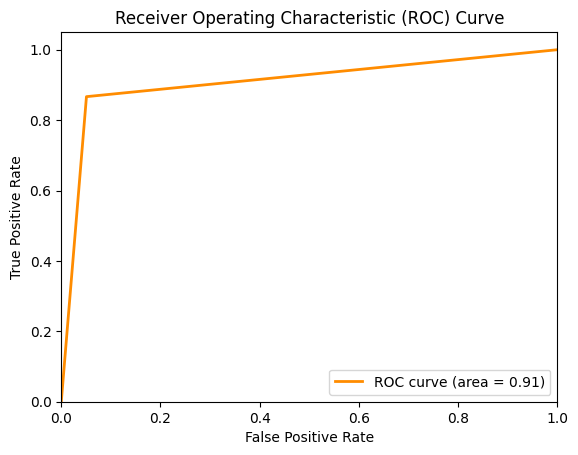

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculate confusion matrix
cm = confusion_matrix(y_test_biopsy, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_biopsy, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####MLP (Multi-layer Perceptron)

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(70,40,30), max_iter=2500, random_state=42)

# Train the MLP classifier on the training data
mlp_classifier.fit(X_train_biopsy, y_train_biopsy)

# Make predictions on the test data
mlp_y_pred = mlp_classifier.predict(X_test_biopsy)
print(mlp_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_biopsy, mlp_y_pred)
print("MLP Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_biopsy, mlp_y_pred)
print("MLP Precision:", precision)

# Calculate recall
recall = recall_score(y_test_biopsy, mlp_y_pred)
print("MLP Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_biopsy, mlp_y_pred)
print("MLP F1-score:", f1)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
MLP Accuracy: 0.9245283018867925
MLP Precision: 0.46153846153846156
MLP Recall: 0.4
MLP F1-score: 0.42857142857142855


Confusion Matrix:
[[190   7]
 [  9   6]]
True Positive Rate (Sensitivity/Recall): 0.4
False Positive Rate: 0.03553299492385787


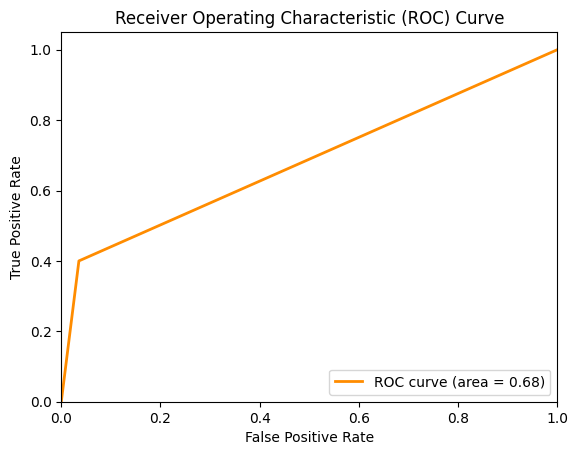

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_biopsy, mlp_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_biopsy, mlp_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train_biopsy, y_train_biopsy)

# Make predictions on the test data
dt_y_pred = dt_classifier.predict(X_test_biopsy)
print(dt_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_biopsy, dt_y_pred)
print("DT Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_biopsy, dt_y_pred)
print("DT Precision:", precision)

# Calculate recall
recall = recall_score(y_test_biopsy, dt_y_pred)
print("DT Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_biopsy, dt_y_pred)
print("DT F1-score:", f1)

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
DT Accuracy: 0.9245283018867925
DT Precision: 0.48
DT Recall: 0.8
DT F1-score: 0.6


Confusion Matrix:
[[187  10]
 [  2  13]]
True Positive Rate (Sensitivity/Recall): 0.8666666666666667
False Positive Rate: 0.050761421319796954


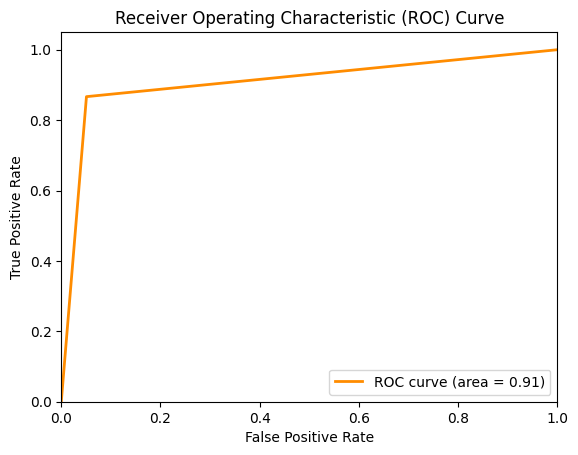

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_biopsy, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_biopsy, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###Combined

In [90]:
from sklearn.model_selection import train_test_split

X_train_comb = final_df_train_comb.drop(columns=['combined'])  # Features
y_train_comb = final_df_train_comb['combined']  # Target variable

X_test_comb = final_df_test_comb.drop(columns=['combined'])  # Features
y_test_comb = final_df_test_comb['combined']  # Target variable

####SVM

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_comb, y_train_comb)

# Make predictions on the test data
svm_y_pred = svm_classifier.predict(X_test_comb)
print(svm_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_comb, svm_y_pred)
print("SVM Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_comb, svm_y_pred)
print("SVM Precision:", precision)

# Calculate recall
recall = recall_score(y_test_comb, svm_y_pred)
print("SVM Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_comb, svm_y_pred)
print("SVM F1-score:", f1)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
SVM Accuracy: 0.8349056603773585
SVM Precision: 0.4
SVM Recall: 0.12121212121212122
SVM F1-score: 0.186046511627907


Confusion Matrix:
[[173   6]
 [ 29   4]]
True Positive Rate (Sensitivity/Recall): 0.12121212121212122
False Positive Rate: 0.0335195530726257


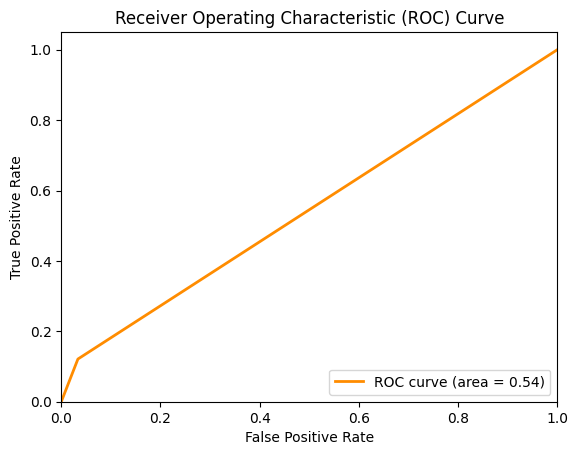

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_comb, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_comb, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####MLP (Multi-layer Perceptron)

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(70,40,30), max_iter=2500, random_state=42)

# Train the MLP classifier on the training data
mlp_classifier.fit(X_train_comb, y_train_comb)

# Make predictions on the test data
mlp_y_pred = mlp_classifier.predict(X_test_comb)
print(mlp_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_comb, mlp_y_pred)
print("MLP Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_comb, mlp_y_pred)
print("MLP Precision:", precision)

# Calculate recall
recall = recall_score(y_test_comb, mlp_y_pred)
print("MLP Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_comb, mlp_y_pred)
print("MLP F1-score:", f1)

[1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
MLP Accuracy: 0.7783018867924528
MLP Precision: 0.18181818181818182
MLP Recall: 0.12121212121212122
MLP F1-score: 0.14545454545454545


Confusion Matrix:
[[161  18]
 [ 29   4]]
True Positive Rate (Sensitivity/Recall): 0.12121212121212122
False Positive Rate: 0.1005586592178771


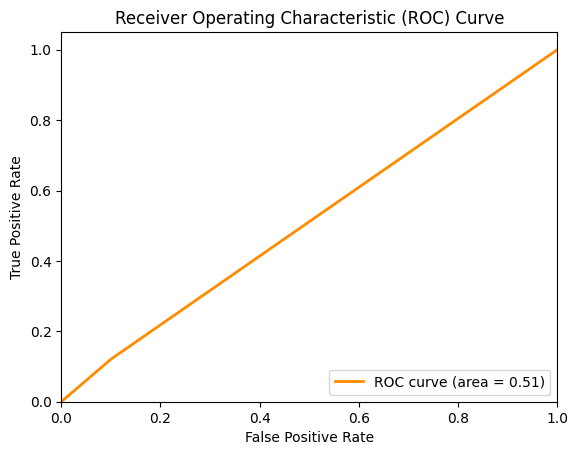

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_comb, mlp_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_comb, mlp_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train_comb, y_train_comb)

# Make predictions on the test data
dt_y_pred = dt_classifier.predict(X_test_comb)
print(dt_y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test_comb, dt_y_pred)
print("DT Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_comb, dt_y_pred)
print("DT Precision:", precision)

# Calculate recall
recall = recall_score(y_test_comb, dt_y_pred)
print("DT Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_comb, dt_y_pred)
print("DT F1-score:", f1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DT Accuracy: 0.8301886792452831
DT Precision: 0.2857142857142857
DT Recall: 0.06060606060606061
DT F1-score: 0.1


Confusion Matrix:
[[173   6]
 [ 29   4]]
True Positive Rate (Sensitivity/Recall): 0.12121212121212122
False Positive Rate: 0.0335195530726257


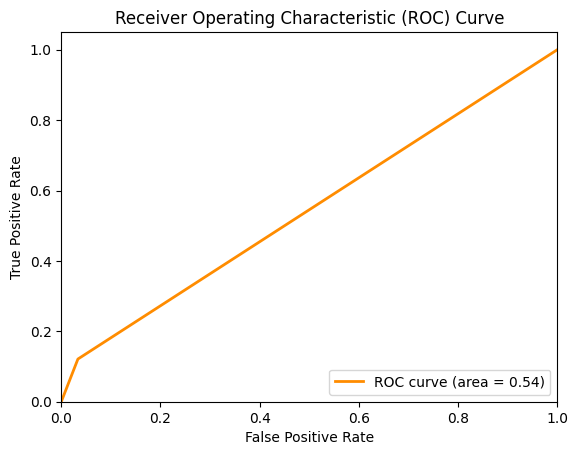

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


# Calculate confusion matrix
cm = confusion_matrix(y_test_comb, svm_y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (Sensitivity/Recall) and False Positive Rate
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("True Positive Rate (Sensitivity/Recall):", tpr)
print("False Positive Rate:", fpr)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_comb, svm_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()